In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
Petri_Thickness = 2.185833333#mm
Petri_Thickness_Error = 0.005#mm
RingDia_wo_Liquid = 7.66#mm
RingDia_wo_Liquid_Error = 0.054893837#mm
RingDia_w_Liquid = 15.84#mm
RingDia_w_Liquid_Error = 0.148772757#mm


# Pfund's Method

In [5]:
d = RingDia_wo_Liquid
t=Petri_Thickness
Dd = RingDia_wo_Liquid_Error
Dt = Petri_Thickness_Error

n_glass = np.sqrt(d**2 + 16*t**2) / d

A = (-16*t**2) / (d**2 * np.sqrt(d**2 + 16*t**2)) * Dd
B = (16*t) / (d * np.sqrt(d**2 + 16*t**2)) * Dt
Dn_glass = np.abs(A) +np.abs(B)
print("Index of Refraction of Glass: ", n_glass, " +/- ", Dn_glass)
print("A =", A)
print("B =", B)

Index of Refraction of Glass:  1.5175165056638327  +/-  0.008116474395772903
A = -0.006152589324897471
B = 0.0019638850708754312


In [6]:
dl = RingDia_w_Liquid
Ddl = RingDia_w_Liquid_Error

n_liquid = (n_glass * dl) / np.sqrt(dl**2 + 16*t**2)

A = (dl / np.sqrt(dl**2 + 16*t**2)) * Dn_glass
B = (16 * t**2 * n_glass / (dl**2 + 16*t**2)**(3/2)) * Dd
C = (-16 * t * dl * n_glass / (dl**2 + 16*t**2)**(3/2)) * Dt

Dn_liquid = np.abs(A)+np.abs(B)+np.abs(C)
print("Index of Refraction of Liquid: ", n_liquid, " +/- ", Dn_liquid)
print("A =", A)
print("B =", B)
print("C =", C)

Index of Refraction of Liquid:  1.3285608418493569  +/-  0.008890740256812163
A = 0.007105840375277966
B = 0.001075200913818256
C = -0.0007096989677159398


# Snell's Law

In [7]:
q1= np.deg2rad([48,54,33]) #rad
q2= np.deg2rad([33,33,25]) #rad
q3= np.deg2rad([35,33,23]) #rad #rad
q4= np.deg2rad([45,34,32]) #rad
q_error = np.deg2rad(0.5) #rad

In [8]:
# With q1 and q2
n_liquid_1 = (np.sin(q1)) / (np.sin(q2))
print("Index of Refraction of Liquid from q1 and q2: ", n_liquid_1)
error_snell = np.abs((np.cos(q1)/np.sin(q2))*q_error) + np.abs((-np.sin(q1)*np.cos(q2)/np.sin(q2)**2)*q_error)
print("Error from Snell's Law: ", error_snell)

Index of Refraction of Liquid from q1 and q2:  [1.36447221 1.48541868 1.28872575]
Error from Snell's Law:  [0.02905693 0.02937881 0.04143538]


In [9]:
#With q3 and q4
n_liquid_2 = (np.sin(q4)) / (np.sin(q3))
print("Index of Refraction of Liquid from q3 and q4: ", n_liquid_2)
error_snell_2 = np.abs((np.cos(q4)/np.sin(q3))*q_error) + np.abs((-np.sin(q4)*np.cos(q3)/np.sin(q3)**2)*q_error)
print("Error from Snell's Law: ", error_snell_2)    


Index of Refraction of Liquid from q3 and q4:  [1.23280305 1.02672204 1.35622485]
Error from Snell's Law:  [0.02612259 0.02708045 0.04682264]


In [10]:
#Average and SDOM
n_liquid_all = np.concatenate((n_liquid_1, n_liquid_2))
n_liquid_avg = np.mean(n_liquid_all)
n_liquid_sdom = np.std(n_liquid_all, ddof=1) / np.sqrt(len(n_liquid_all))
print("Average Index of Refraction of Liquid from Snell's Law: ", n_liquid_avg)
print("SDOM of Index of Refraction of Liquid from Snell's Law: ", n_liquid_sdom)

Average Index of Refraction of Liquid from Snell's Law:  1.2923944283678774
SDOM of Index of Refraction of Liquid from Snell's Law:  0.06342299670931058


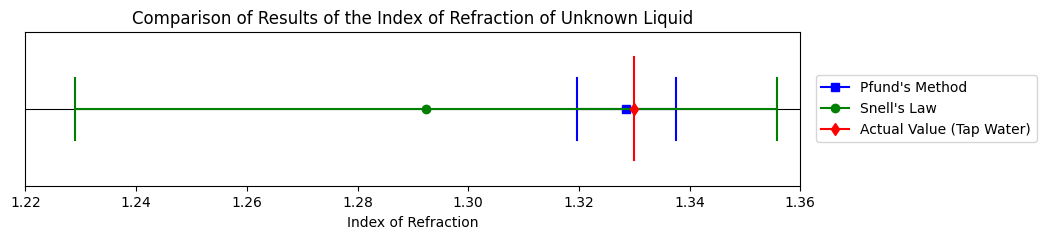

In [17]:
# Create the plot
fig, ax = plt.subplots(figsize=(10, 2))

# Create number line
ax.axhline(y=0, color='black', linewidth=0.8)
ax.set_xlim(1.22,1.36)
ax.set_ylim(-0.75, 0.75)  # Extended y-limit to accommodate vertical lines

# Remove y-axis
ax.yaxis.set_visible(False)

# Set x-axis label if needed
ax.set_xlabel('Index of Refraction')

# Height of vertical error bar caps
err_height = 0.3
y_pos = 0
# Pfund Method
value = n_liquid
error = Dn_liquid
ax.plot([value - error, value + error], [y_pos, y_pos],color='blue')
ax.plot([value - error, value - error], [y_pos - err_height, y_pos + err_height],color='blue')
ax.plot([value + error, value + error], [y_pos - err_height, y_pos + err_height],color='blue')
ax.plot(value, y_pos, marker='s', color='blue',label="Pfund's Method")

# Snell
value = n_liquid_avg
error = n_liquid_sdom
ax.plot([value - error, value + error], [y_pos, y_pos],color='green')
ax.plot([value - error, value - error], [y_pos - err_height, y_pos + err_height],color='green')
ax.plot([value + error, value + error], [y_pos - err_height, y_pos + err_height],color='green')
ax.plot(value, y_pos, marker='o', color='green',label="Snell's Law")

# Actual value
value = 1.33
ax.plot([value, value], [y_pos - .5, y_pos + .5],color='red')
ax.plot(value, y_pos, marker='d', color='red',label="Actual Value (Tap Water)")

ax.legend(
    loc="center left",
    bbox_to_anchor=(1.02, 0.5),   # push legend outside
    borderaxespad=0
)
# Add title
plt.title('Comparison of Results of the Index of Refraction of Unknown Liquid')
plt.savefig('results', dpi=300, bbox_inches='tight')
plt.show()

